In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage import distance_transform_edt
from scipy.signal import convolve2d

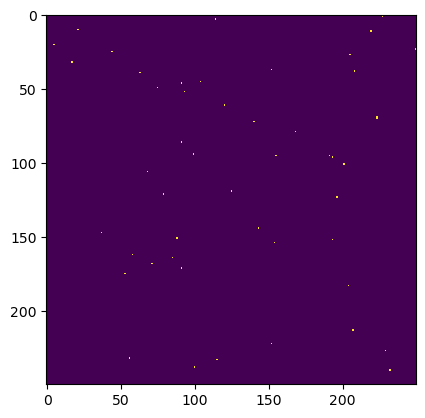

In [3]:
WW = np.random.uniform(size=(250, 250)) < 0.001
# WW = np.zeros((250, 250))
# WW = WW.flatten()
# WW[::531] = 1
# WW = np.reshape(WW, (250, 250))


plt.imshow(WW, interpolation="none")

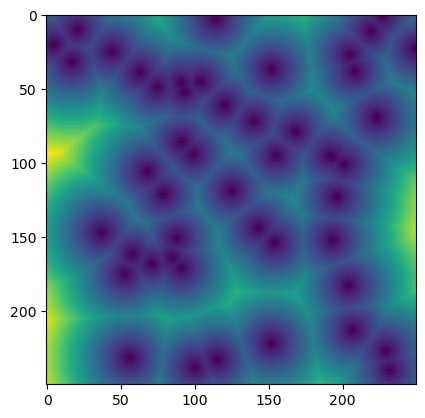

In [4]:
DD = distance_transform_edt(1 - WW)
plt.imshow(DD, interpolation="none")

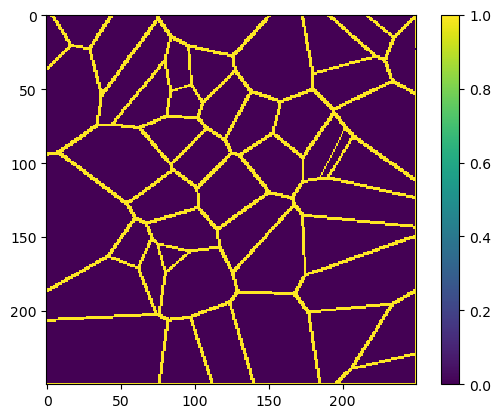

In [5]:
KK = np.array(
    [
        [0, -1, 0],
        [-1, 4, -1],
        [0, -1, 0],
    ],
    dtype=np.float64,
)

KK2 = -np.array(
    [
        [0.25, 0.5, 0.25],
        [0.5, -3.0, 0.5],
        [0.25, 0.5, 0.25],
    ]
)

CC = convolve2d(DD, KK2, mode="same", boundary="pad")
CC = CC > 0

# CC_x = (DD[1:-1, 1:-1] > DD[1:-1, 0:-2]) & (DD[1:-1, 1:-1] > DD[1:-1, 2:])
# CC_y = (DD[1:-1, 1:-1] > DD[0:-2, 1:-1]) & (DD[1:-1, 1:-1] > DD[2:, 1:-1])

# CC = CC_x | CC_y

WW_ = np.copy(WW)
WW_[WW_ < 1] = np.nan

plt.imshow(CC, interpolation="none")

plt.colorbar()

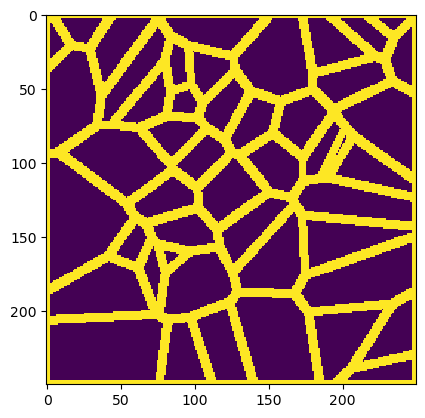

In [6]:
VV = distance_transform_edt(1 - CC) < 2.5

plt.imshow(VV, interpolation="none")

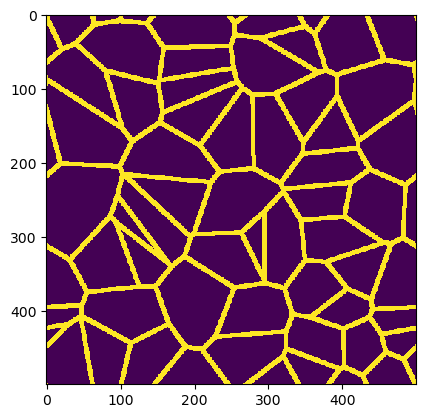

In [10]:
def voronoi(
    points: np.ndarray, extent: np.ndarray, counts: np.ndarray, width: float, upsample: int = 4
) -> np.ndarray:
    assert points.ndim == 2
    assert points.shape[1] == 2
    assert extent.shape == (2, 2)
    assert counts.shape == (2,)

    counts_ = counts * upsample

    II = (counts_[0] * (points[:, 0] - extent[0, 0]) / (extent[0, 1] - extent[0, 0])).astype(
        np.int64
    )
    JJ = (counts_[1] * (points[:, 1] - extent[1, 0]) / (extent[1, 1] - extent[1, 0])).astype(
        np.int64
    )

    WW = np.zeros(tuple(counts_))
    WW[II, JJ] = 1

    WW = np.tile(WW, (3, 3))

    KK = np.array(
        [
            [0, -1, 0],
            [-1, 4, -1],
            [0, -1, 0],
        ],
    )

    DD = distance_transform_edt(1 - WW)
    CC = convolve2d(DD, KK) > 0

    # TODO: downsample here

    VV = distance_transform_edt(1 - CC) < (width * upsample)

    # chop out middle of periodic tiling
    VV = VV[counts_[0] : 2 * counts_[0], counts_[1] : 2 * counts_[1]]

    return VV


points = np.random.uniform(size=(50, 2))
# points = np.array([[0.25, 0.25], [0.75, 0.7], [0.2, 0.71], [0.76, 0.3]])
extent = np.array([[0, 1], [0, 1]])
counts = np.array([500, 500])

VV = voronoi(points, extent, counts, 3, upsample=1)
VV.shape

plt.imshow(VV, interpolation="none")